In [1]:
#read data

import pandas as pd
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#define input(x), output(y)

x=df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=df['Species']

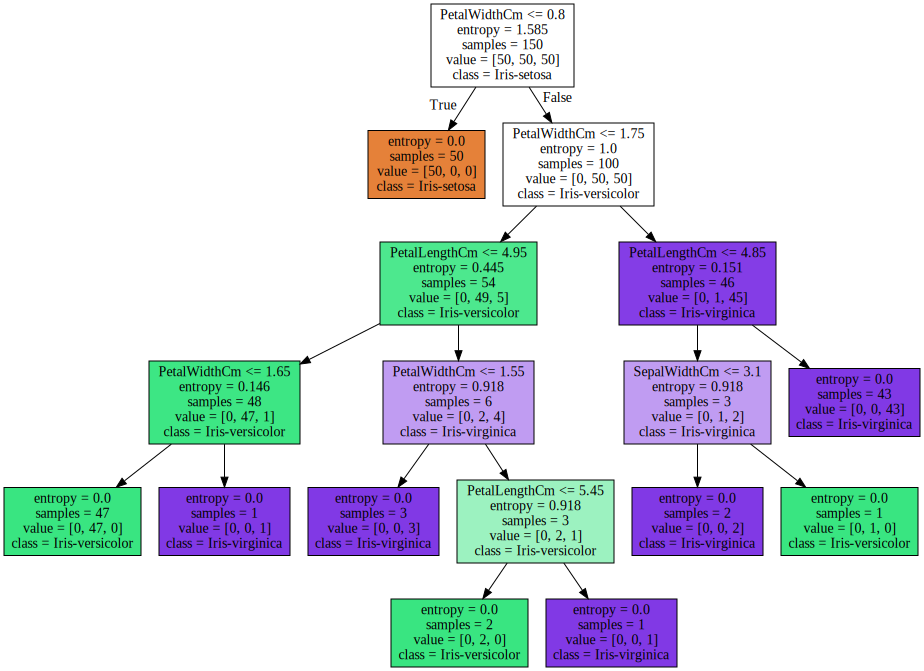

In [3]:
#desicion tree

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x, y)
import graphviz 
class_name = [str(s) for s in y.unique()]
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                feature_names=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                                class_names=class_name, 
                                filled=True
                                ) 
graph = graphviz.Source(dot_data) 
graph

In [4]:
#evaluation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=5)
print('Accuracy:',scores.mean())

Accuracy: 0.9533333333333334


In [7]:
#save mode
import joblib 
filename = 'tree.model'
clf = clf.fit(x, y)
joblib.dump(clf, filename)

['tree.model']

In [9]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x, y)
print(result)

1.0


In [11]:
pred_results = loaded_model.predict(x)

In [12]:
#confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y, pred_results)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])